In [1]:
import networkx as nx
import pickle
import gamms
import sys
import os
import importlib as imp

import lib.utils.graph_utils as GRUTL
import lib.visual.graph_visualizer as GRVIS
import lib.core.core as CORE
imp.reload(GRUTL)
imp.reload(GRVIS)
imp.reload(CORE)
from lib.core.core import *

pygame 2.6.1 (SDL 2.28.4, Python 3.13.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
GRAPH_PATH = os.path.join("data", "graphs", "")
RESOLUTIONS = [200]
GRAPH_SIZE = [200]
LOCATION = "West Point, New York, USA"

# Check if graph_path exists
if not os.path.exists(GRAPH_PATH):
    error(f"Graph path {GRAPH_PATH} does not exist")
    sys.exit(1)
else:
    success(f"Graph path {GRAPH_PATH} exists")

[18:24:15.346][488071626.py::<module>] ✓ Success: Graph path data/graphs/ exists


[18:24:15.351][906317822.py::<module>] ℹ Info: Generating graph with 200 nodes and resolution 200...
[18:24:17.035][906317822.py::<module>] ⚠ Warning: Graph is not a MultiDiGraph, converting...
[18:24:17.037][graph_utils.py::cast_to_multidigraph] ℹ Info: Added 0 reverse edge(s) to ensure bidirectionality.
[18:24:17.037][graph_utils.py::cast_to_multidigraph] ✓ Success: Converted DiGraph to MultiDiGraph with 490 nodes and 1296 edges.
[18:24:17.042][906317822.py::<module>] ✓ Success: Graph reduced from 490 to 200 nodes.
[18:24:17.045][906317822.py::<module>] ✓ Success: Graph saved to data/graphs/graph_200_200.pkl with 200 nodes.
[18:24:17.691][graph_visualizer.py::_visualize_static] ✓ Success: Static graph saved to data/image/graph_200_200.png


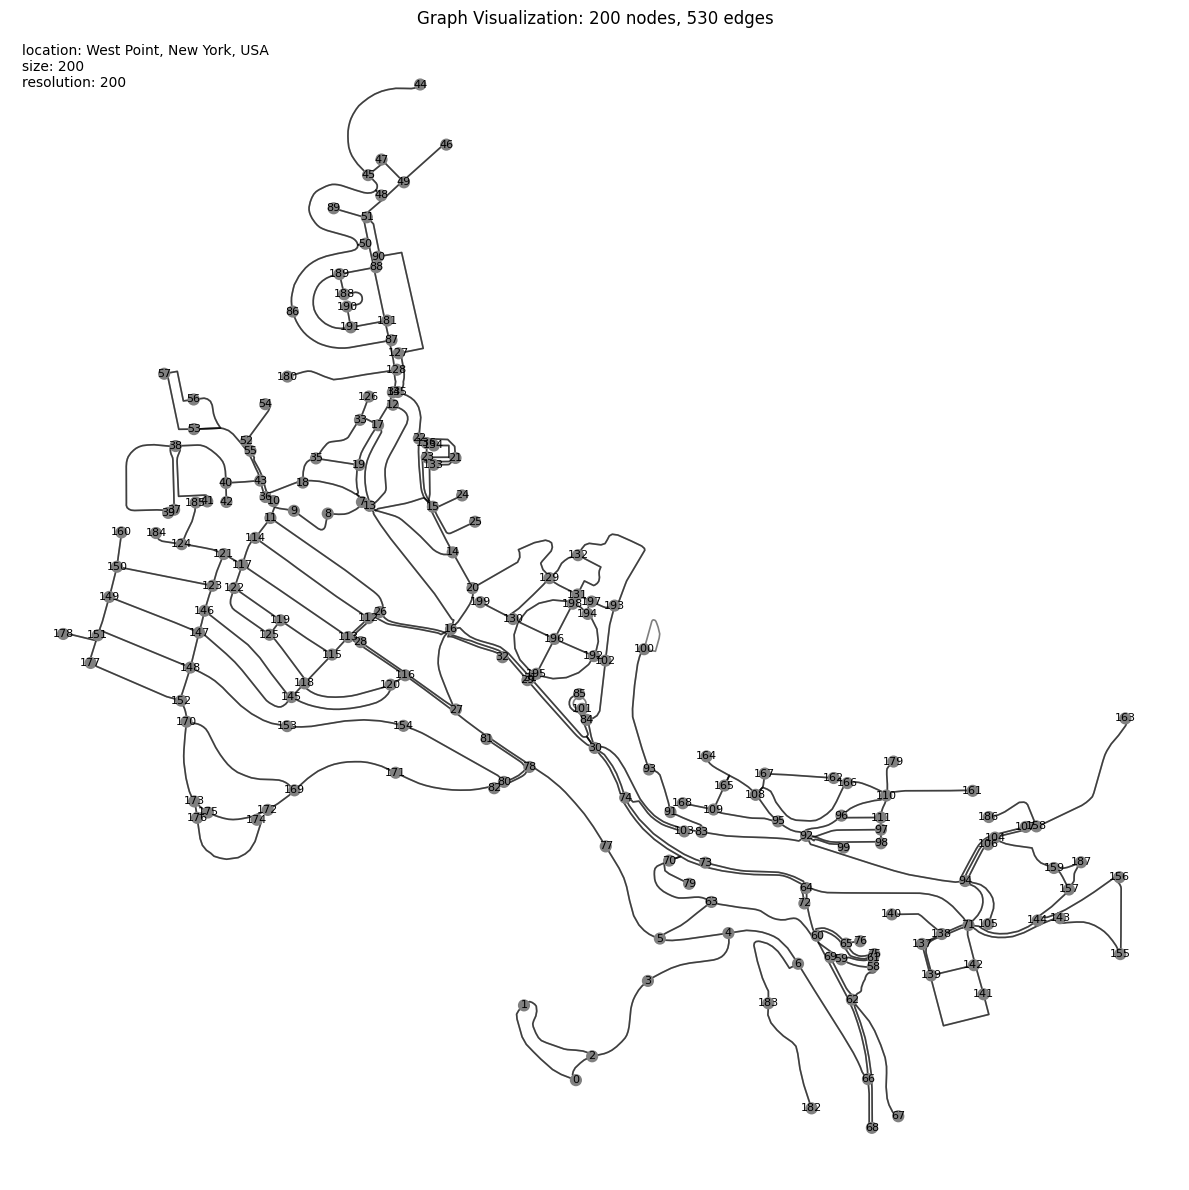

[18:24:17.809][906317822.py::<module>] ✓ Success: Image path data/image/ exists, visualizing graph...


In [3]:
for resolution in RESOLUTIONS:
    for size in GRAPH_SIZE:
        info(f"Generating graph with {size} nodes and resolution {resolution}...")
        graph_path = GRAPH_PATH + f"graph_{size}_{resolution}.pkl"

        G = gamms.osm.create_osm_graph(LOCATION, resolution=resolution)
        # Check if G is a MultiDiGraph
        if not isinstance(G, nx.MultiDiGraph):
            warning(f"Graph is not a MultiDiGraph, converting...")
            G = GRUTL.cast_to_multidigraph(G, debug=True)

        if size is not None and len(G.nodes) > size:
            try:
                original_node_count = len(G.nodes)
                G = GRUTL.reduce_graph_to_size(G, size)
                success(f"Graph reduced from {original_node_count} to {len(G.nodes)} nodes.")
            except Exception as e:
                error(f"Error reducing graph: {e}")

        # Save the graph
        with open(graph_path, "wb") as f:
            pickle.dump(G, f)
        success(f"Graph saved to {graph_path} with {len(G.nodes)} nodes.")

        # Visualize the graph
        visual = GRVIS.GraphVisualizer(G=G, mode="static", extra_info={"location": LOCATION, "size": size, "resolution": resolution})
        IMAGE_PATH = os.path.join("data", "image", "")
        if not os.path.exists(IMAGE_PATH):
            error(f"Image path {IMAGE_PATH} does not exist")
            sys.exit(1)
        else:
            visual.visualize(save_path=os.path.join(IMAGE_PATH, f"graph_{size}_{resolution}.png"), transparent_background=False)
            success(f"Image path {IMAGE_PATH} exists, visualizing graph...")

In [4]:
# import networkx as nx
# from shapely.geometry import Point, LineString
# import math
# import os # Added import for os.path
# # Assuming GRVIS is available (e.g., from lib.visual.graph_visualizer import GraphVisualizer as GRVIS)
# # If not, the visualization part will fail later. You might need to import it.
# # import lib.visual.graph_visualizer as GRVIS # Example import

# def create_grid_graph_with_diagonals(rows=20, cols=20):
#     """
#     Generates a grid graph with horizontal, vertical, and diagonal edges,
#     mimicking the node and edge properties of the osm.py generated graphs.

#     Args:
#         rows (int): Number of rows in the grid.
#         cols (int): Number of columns in the grid.

#     Returns:
#         nx.DiGraph: A NetworkX directed graph representing the grid with
#                     OSM-like node and edge attributes.
#     """
#     G = nx.DiGraph()
#     node_id_map = {}
#     current_node_id = 0

#     # 1. Create nodes with x, y attributes
#     # Map (row, col) grid positions to integer node IDs and store coordinates
#     for r in range(rows):
#         for c in range(cols):
#             node_id = current_node_id
#             node_id_map[(r, c)] = node_id
#             # Assign x=col, y=row as coordinates
#             G.add_node(node_id, x=float(c), y=float(r))
#             current_node_id += 1

#     current_edge_id = 0

#     # 2. Add edges (horizontal, vertical, diagonal) with attributes
#     for r in range(rows):
#         for c in range(cols):
#             u_id = node_id_map[(r, c)]
#             u_coords = (G.nodes[u_id]['x'], G.nodes[u_id]['y'])

#             # Define potential neighbors (including diagonals)
#             # dr, dc, is_diagonal
#             neighbors = [
#                 (0, 1, False),  # Right
#                 (1, 0, False),  # Down
#                 (1, 1, True),   # Down-Right Diagonal
#                 (1, -1, True)   # Down-Left Diagonal
#             ]

#             for dr, dc, is_diagonal in neighbors:
#                 nr, nc = r + dr, c + dc

#                 # Check if neighbor is within grid bounds
#                 if 0 <= nr < rows and 0 <= nc < cols:
#                     v_id = node_id_map[(nr, nc)]
#                     v_coords = (G.nodes[v_id]['x'], G.nodes[v_id]['y'])

#                     # Create LineString geometry
#                     line = LineString([u_coords, v_coords])
#                     # Calculate Euclidean distance for length
#                     length = math.dist(u_coords, v_coords)

#                     # Add edge u -> v
#                     if not G.has_edge(u_id, v_id):
#                         G.add_edge(u_id, v_id, id=current_edge_id, linestring=line, length=length)
#                         current_edge_id += 1

#                     # Add reverse edge v -> u (bidirectional)
#                     if not G.has_edge(v_id, u_id):
#                         # Create reversed linestring
#                         rev_line = LineString(line.coords[::-1])
#                         G.add_edge(v_id, u_id, id=current_edge_id, linestring=rev_line, length=length)
#                         current_edge_id += 1

#     print(f"Generated a {rows}x{cols} grid graph.")
#     print(f"Number of nodes: {G.number_of_nodes()}")
#     print(f"Number of edges: {G.number_of_edges()}")
#     return G

# # --- Example Usage ---
# if __name__ == "__main__":
#     grid_graph_di = create_grid_graph_with_diagonals(rows=20, cols=20) # Renamed to indicate DiGraph

#     # You can now inspect the graph, nodes, and edges
#     # Example: Print info for node 0 and its neighbors
#     if 0 in grid_graph_di:
#         print(f"\nNode 0 data: {grid_graph_di.nodes[0]}")
#         print("Edges connected to node 0:")
#         for u, v, data in grid_graph_di.edges(0, data=True):
#             print(f"  Edge ({u} -> {v}): ID={data.get('id')}, Length={data.get('length'):.2f}, Geometry={data.get('linestring')}")
#         for u, v, data in grid_graph_di.in_edges(0, data=True):
#              print(f"  Edge ({u} -> {v}): ID={data.get('id')}, Length={data.get('length'):.2f}, Geometry={data.get('linestring')}")


#     # Example: Check properties of an edge (e.g., edge with id 0 if it exists)
#     edge_id_to_check = 0
#     found_edge = False
#     for u, v, data in grid_graph_di.edges(data=True):
#         if data.get('id') == edge_id_to_check:
#             print(f"\nEdge ID {edge_id_to_check} data ({u} -> {v}): {data}")
#             found_edge = True
#             break
#     if not found_edge:
#          print(f"\nEdge ID {edge_id_to_check} not found.")

#     # You could also save this graph using pickle like in your notebook
#     # import pickle
#     # with open("grid_graph_20x20.pkl", "wb") as f:
#     #     pickle.dump(grid_graph_di, f)
#     # print("\nGraph saved to grid_graph_20x20.pkl")

#     # --- Visualization Example (Corrected) ---
#     # Ensure GRVIS is imported if running this part
#     try:
#         # Assuming GRVIS is available, e.g.:

#         # Convert the DiGraph to MultiDiGraph before passing to visualizer
#         grid_graph_multi = nx.MultiDiGraph(grid_graph_di)
#         print("\nConverting DiGraph to MultiDiGraph for visualization.")

#         visual = GRVIS.GraphVisualizer(G=grid_graph_multi, mode="static", extra_info={"location": "Grid Graph", "rows": 20, "cols": 20})
#         IMAGE_PATH = os.path.join("data", "image", "") # Define IMAGE_PATH if not defined elsewhere
#         # Create directory if it doesn't exist
#         os.makedirs(IMAGE_PATH, exist_ok=True)
#         visual.visualize(save_path=os.path.join(IMAGE_PATH, "grid_graph_20x20.png"), transparent_background=False)

#         save_path=os.path.join(IMAGE_PATH, "grid_graph_20x20_viz.png")
#         visual.visualize(save_path=save_path, transparent_background=False)
#         print(f"Visualization saved to {save_path}")

#     except ImportError:
#         print("\nSkipping visualization example: GRVIS module not found.")
#     except Exception as e:
#         print(f"\nError during visualization: {e}")

